# Importacion de la Biblioteca

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Definir una función para ejecutar consultas SQL y devolver un DataFrame
def ejecutar_consulta_sql(query):
    # Conectar a la base de datos
    with sqlite3.connect('Northwind.db') as conn:
        # Ejecutar la consulta SQL y leer los resultados en un DataFrame
        df = pd.read_sql_query(query, conn)
    return df

# Análisis de ventas

¿Cuáles son los productos más vendidos?

In [2]:
query_ventas = "SELECT p.ProductID, p.ProductName, SUM(o.Quantity) as Total_Vendidos FROM Products p JOIN OrderDetails o ON p.ProductID = o.ProductID GROUP BY p.ProductID, p.ProductName ORDER BY Total_Vendidos DESC LIMIT 10"
df_ventas = ejecutar_consulta_sql(query_ventas)
print("Los productos mas vendidos son: ")
df_ventas

Los productos mas vendidos son: 


,ProductID,ProductName,Total_Vendidos
0,31,Gorgonzola Telino,458
1,60,Camembert Pierrot,430
2,35,Steeleye Stout,369
3,59,Raclette Courdavault,346
4,2,Chang,341
5,16,Pavlova,338
6,71,Fløtemysost,336
7,17,Alice Mutton,331
8,62,Tarte au sucre,325
9,33,Geitost,316


<Figure size 1200x900 with 0 Axes>

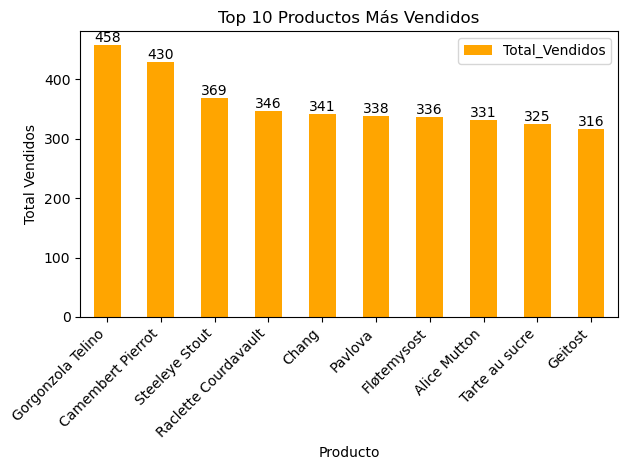

In [3]:
%matplotlib inline
# Crear el gráfico de barras
plt.figure(figsize=(12, 9))
df_ventas.plot(kind='bar', x='ProductName', y='Total_Vendidos', color='orange')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Total Vendidos')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de datos encima de las barras
for i, value in enumerate(df_ventas['Total_Vendidos']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

¿Cuál es el total de ventas por año/mes/día?

In [4]:
total_ventas_anio = "SELECT strftime('%Y', o.OrderDate) AS Año, strftime('%m', o.OrderDate) AS Mes, strftime('%d', o.OrderDate) AS Día, SUM(od.Quantity * p.Price) AS Total_Ventas FROM Orders o JOIN OrderDetails od ON o.OrderID = od.OrderID JOIN Products p ON od.ProductID = p.ProductID GROUP BY Año, Mes, Día ORDER BY Año, Mes, Día"
df_total_ventas_anio = ejecutar_consulta_sql(total_ventas_anio)
print("El Total de ventas por Año-Mes-Dia")
df_total_ventas_anio

El Total de ventas por Año-Mes-Dia


,Año,Mes,Día,Total_Ventas
0,1996,07,04,566.00
1,1996,07,05,2329.25
2,1996,07,08,3106.75
3,1996,07,09,4662.50
4,1996,07,10,1806.00
...,...,...,...,...
155,1997,02,06,710.50
156,1997,02,07,1348.70
157,1997,02,10,9441.01
158,1997,02,11,2246.00


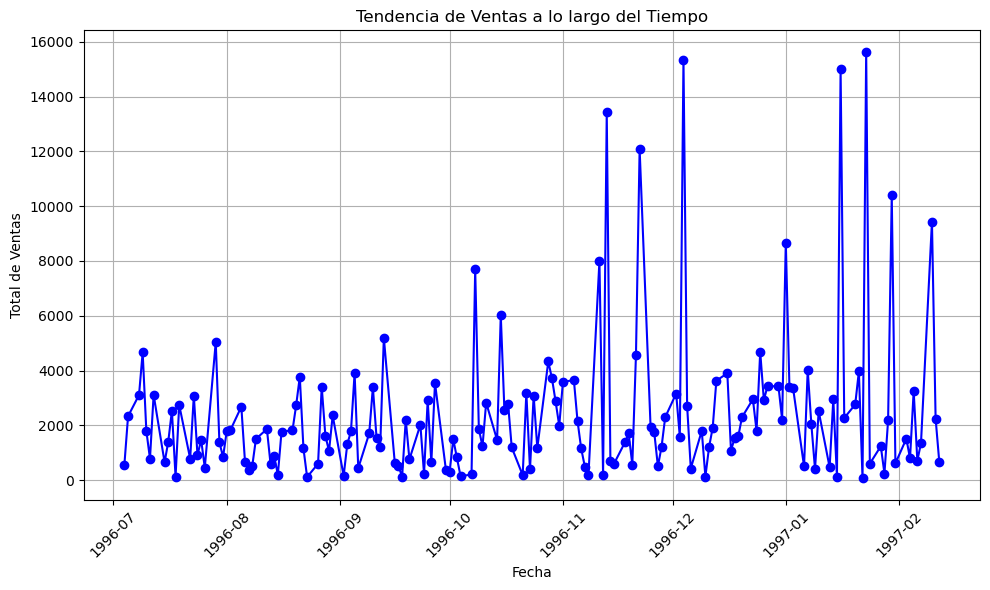

In [5]:
# Definir los datos para el gráfico
fechas = df_total_ventas_anio['Año'] + '-' + df_total_ventas_anio['Mes'] + '-' + df_total_ventas_anio['Día']
total_ventas = df_total_ventas_anio['Total_Ventas']

# Convertir las fechas a tipo datetime
fechas = pd.to_datetime(fechas)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(fechas, total_ventas, marker='o', linestyle='-', color='b')
plt.title('Tendencia de Ventas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


¿Cuál es el cliente que más ha gastado?

In [6]:
cliente_gastador = "SELECT c.CustomerID, c.CustomerName, SUM(od.Quantity * p.Price) AS Total_Gastado FROM Customers c JOIN Orders o ON c.CustomerID = o.CustomerID JOIN OrderDetails od ON o.OrderID = od.OrderID JOIN Products p ON od.ProductID = p.ProductID GROUP BY c.CustomerID, c.CustomerName ORDER BY Total_Gastado DESC LIMIT 1"
df_gastador_cliente = ejecutar_consulta_sql(cliente_gastador)
df_gastador_cliente

,CustomerID,CustomerName,Total_Gastado
0,20,Ernst Handel,35631.21


¿Cuál es la categoría de productos más rentable?

In [7]:
categoria_mas_rentable = "SELECT c.CategoryID, c.CategoryName, SUM(od.Quantity * p.Price) AS Ingresos FROM Categories c JOIN Products p ON c.CategoryID = p.CategoryID JOIN OrderDetails od ON p.ProductID = od.ProductID GROUP BY c.CategoryID, c.CategoryName ORDER BY Ingresos DESC LIMIT 1"
df_mas_rentable = ejecutar_consulta_sql(categoria_mas_rentable)
df_mas_rentable

,CategoryID,CategoryName,Ingresos
0,1,Beverages,99464.5


# Análisis de productos

¿Cuántos productos hay en cada categoría?

In [8]:
productos_categoria = "SELECT c.CategoryID, c.CategoryName, COUNT(p.ProductID) AS Total_Productos FROM Categories c LEFT JOIN Products p ON c.CategoryID = p.CategoryID GROUP BY c.CategoryID, c.CategoryName ORDER BY Total_Productos DESC"
df_productos_categoria = ejecutar_consulta_sql(productos_categoria)
df_productos_categoria

,CategoryID,CategoryName,Total_Productos
0,3,Confections,13
1,1,Beverages,12
2,2,Condiments,12
3,8,Seafood,12
4,4,Dairy Products,10
5,5,Grains/Cereals,7
6,6,Meat/Poultry,6
7,7,Produce,5


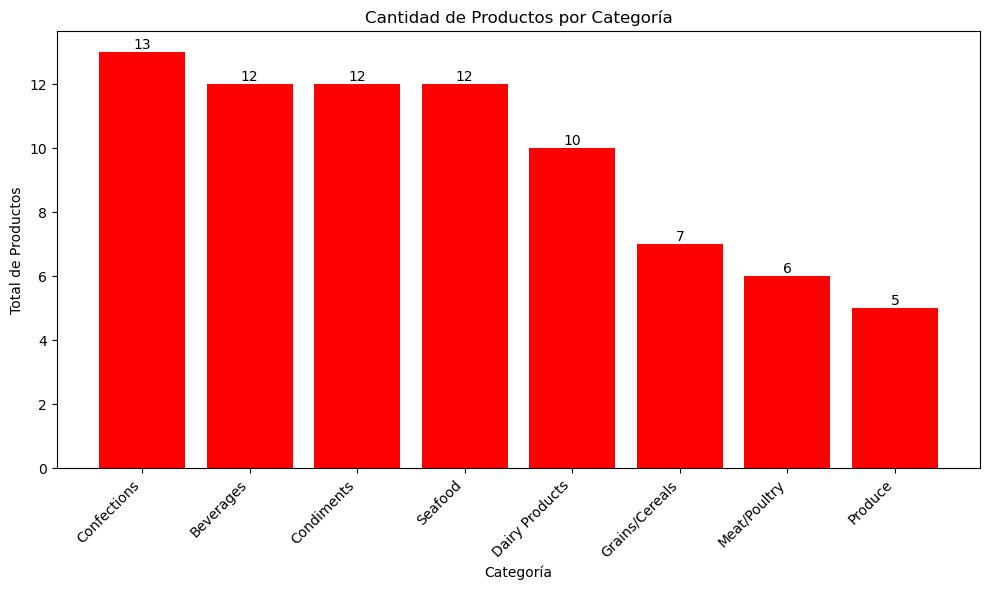

In [9]:
# Obtener los datos del DataFrame df_productos_categoria
categorias = df_productos_categoria['CategoryName']
total_productos = df_productos_categoria['Total_Productos']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias, total_productos, color='r')
plt.title('Cantidad de Productos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de Productos')
plt.xticks(rotation=45, ha='right')


# Agregar etiquetas de datos encima de las barras
for i, value in enumerate(total_productos):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


¿Cuál es el producto más caro/más barato?

In [10]:
producto_caro = "SELECT ProductName,Price FROM Products ORDER BY Price DESC LIMIT 1"
df_producto_caro = ejecutar_consulta_sql(producto_caro)
print("Producto mas Caro es")
df_producto_caro

Producto mas Caro es


,ProductName,Price
0,Côte de Blaye,263.5


In [11]:
producto_mas_barato = "SELECT ProductName,Price FROM Products WHERE ProductName IS NOT NULL ORDER BY Price ASC LIMIT 1"
df_producto_mas_barato = ejecutar_consulta_sql(producto_mas_barato)
print("El Producto mas barato es ")
df_producto_mas_barato

El Producto mas barato es 


,ProductName,Price
0,Geitost,2.5


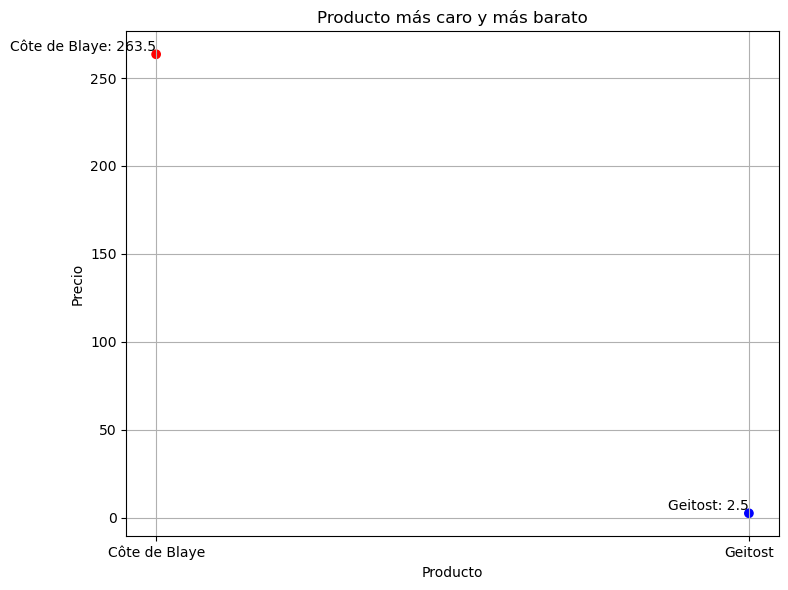

In [12]:
# Obtener los nombres y precios de los productos más caro y más barato
producto_caro = df_producto_caro.iloc[0]['ProductName']
precio_caro = df_producto_caro.iloc[0]['Price']

producto_barato = df_producto_mas_barato.iloc[0]['ProductName']
precio_barato = df_producto_mas_barato.iloc[0]['Price']

# Crear el gráfico de puntos
plt.figure(figsize=(8, 6))
plt.scatter([producto_caro, producto_barato], [precio_caro, precio_barato], color=['red', 'blue'])
plt.title('Producto más caro y más barato')
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.grid(True)

# Agregar etiquetas de datos a los puntos
plt.text(producto_caro, precio_caro, f'{producto_caro}: {precio_caro}', ha='right', va='bottom')
plt.text(producto_barato, precio_barato, f'{producto_barato}: {precio_barato}', ha='right', va='bottom')

plt.tight_layout()
plt.show()


¿Cuál es el producto más popular basado en el número de pedidos?

In [13]:
producto_popular = "SELECT p.ProductName, COUNT(od.ProductID) AS TotalPedidos FROM Products p JOIN OrderDetails od ON p.ProductID = od.ProductID GROUP BY p.ProductName ORDER BY TotalPedidos DESC LIMIT 1"
df_producto_popular = ejecutar_consulta_sql(producto_popular)
df_producto_popular

,ProductName,TotalPedidos
0,Raclette Courdavault,14


# Análisis de clientes

¿Cuántos clientes hay en cada región?

In [14]:
consulta_cliente = "SELECT City, COUNT(CustomerID) AS TotalClientes FROM Customers WHERE City IS NOT NULL GROUP BY City ORDER BY TotalClientes DESC LIMIT 10"
df_cliente_region = ejecutar_consulta_sql(consulta_cliente)
df_cliente_region

,City,TotalClientes
0,London,6
1,México D.F.,5
2,São Paulo,4
3,Rio de Janeiro,3
4,Madrid,3
5,Buenos Aires,3
6,Portland,2
7,Paris,2
8,Nantes,2
9,Lisboa,2


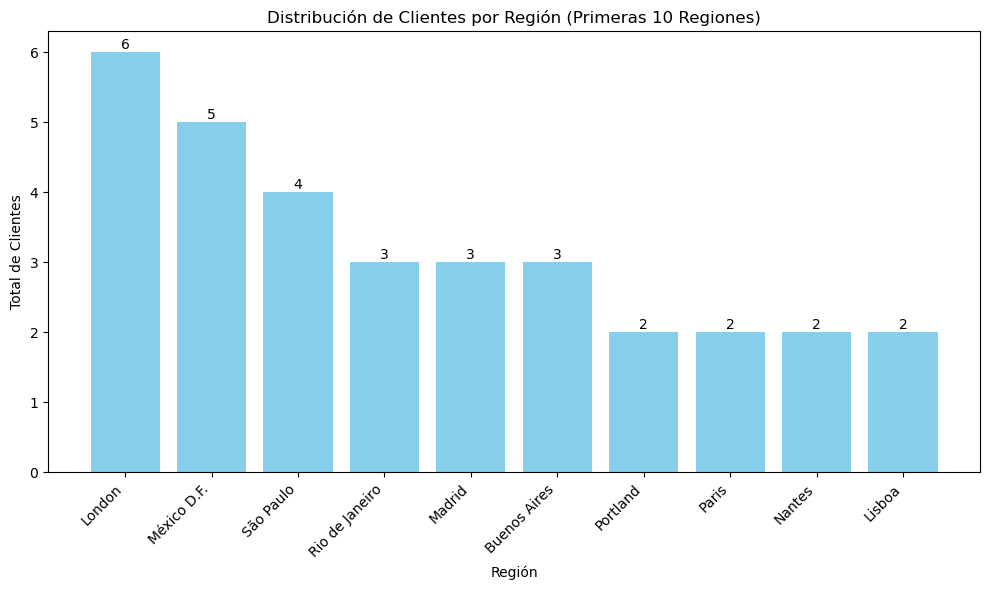

In [15]:
# Obtener los datos de las regiones y el número total de clientes
regiones = df_cliente_region['City']
total_clientes = df_cliente_region['TotalClientes']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(regiones, total_clientes, color='skyblue')
plt.title('Distribución de Clientes por Región (Primeras 10 Regiones)')
plt.xlabel('Región')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de datos encima de las barras
for i, value in enumerate(total_clientes):
    if not pd.isnull(value):  # Verificar si el valor no es nulo
        plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


¿Cuál es el país con más clientes?

In [16]:
consulta_con_mas_cliente = "SELECT Country,COUNT(CustomerID) AS TotalPaisPorCliente FROM Customers WHERE Country IS NOT NULL GROUP BY Country ORDER BY TotalPaisPorCliente DESC LIMIT 10"
df_consulta_con_mas_cliente_por_pais = ejecutar_consulta_sql(consulta_con_mas_cliente)
df_consulta_con_mas_cliente_por_pais

,Country,TotalPaisPorCliente
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


El pais con mas clientes es Estados Unidos con un total de 13 clientes 

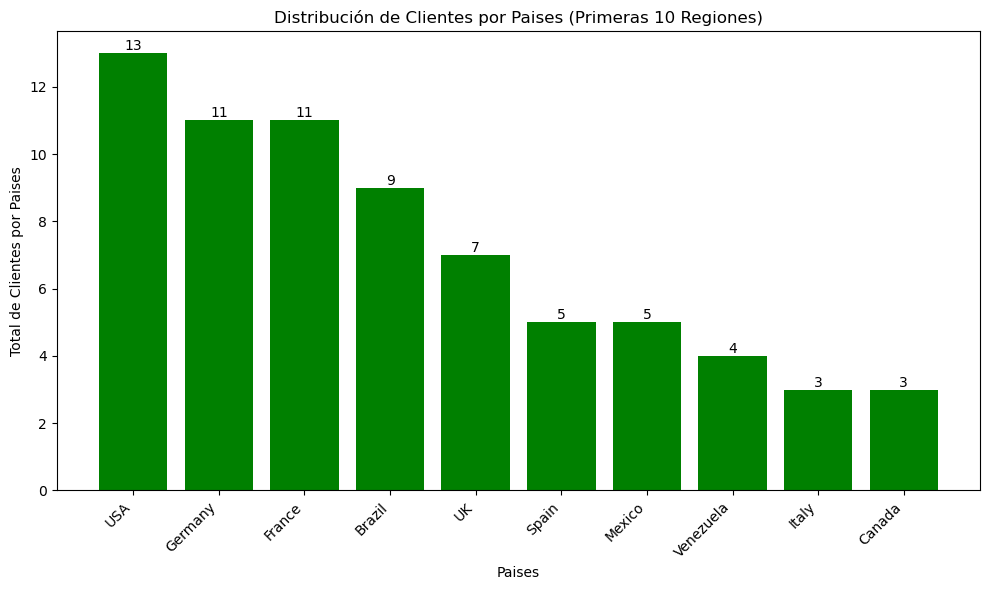

In [17]:
# Obtener los datos de las regiones y el número total de clientes
paises = df_consulta_con_mas_cliente_por_pais['Country']
total_clientes_por_paises = df_consulta_con_mas_cliente_por_pais['TotalPaisPorCliente']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(paises, total_clientes_por_paises, color='g')
plt.title('Distribución de Clientes por Paises (Primeras 10 Regiones)')
plt.xlabel('Paises')
plt.ylabel('Total de Clientes por Paises')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de datos encima de las barras
for i, value in enumerate(total_clientes_por_paises):
    if not pd.isnull(value):  # Verificar si el valor no es nulo
        plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


¿Cuál es el cliente que ha realizado más pedidos?

In [18]:
consulta_cliente_pedidos = "SELECT CustomerID,COUNT(OrderID) AS TotalPedidos FROM Orders GROUP BY CustomerID ORDER BY TotalPedidos DESC LIMIT 1"
df_consulta_cliente_mas_pedidos = ejecutar_consulta_sql(consulta_cliente_pedidos)
print("El Cliente que ha realizado mas pedido es ")
df_consulta_cliente_mas_pedidos

El Cliente que ha realizado mas pedido es 


,CustomerID,TotalPedidos
0,20,10


¿Cuál es el cliente más fiel (el que más ha comprado a lo largo del tiempo)?

In [19]:
cliente_mas_fiel = "SELECT o.CustomerID, SUM(p.Price * od.Quantity) AS TotalGastado FROM Orders o JOIN OrderDetails od ON o.OrderID = od.OrderID JOIN Products p ON od.ProductID = p.ProductID GROUP BY o.CustomerID ORDER BY TotalGastado DESC LIMIT 1"
df_cliente_mas_fiel = ejecutar_consulta_sql(cliente_mas_fiel)
df_cliente_mas_fiel

,CustomerID,TotalGastado
0,20,35631.21


# Análisis de empleados

¿Cuál es el empleado que ha manejado más pedidos?

In [20]:
consulta_empleado = "SELECT EmployeeID,COUNT(OrderID) AS TotalPedidos FROM Orders GROUP BY EmployeeID ORDER BY TotalPedidos DESC LIMIT 1"
df_consulta_empleado = ejecutar_consulta_sql(consulta_empleado)
df_consulta_empleado

,EmployeeID,TotalPedidos
0,4,40


¿Cuál es el empleado más productivo (mayor número de pedidos procesados)?

In [21]:
consulta_empleado_mas_productivo = "SELECT EmployeeID,(SELECT FirstName || ' ' || LastName FROM Employees WHERE EmployeeID = o.EmployeeID) AS NombreDeEmpleados,COUNT(OrderID) AS TotalPedidos FROM Orders o GROUP BY EmployeeID ORDER BY TotalPedidos DESC LIMIT 1"
df_consulta_empleado_mas_productivo = ejecutar_consulta_sql(consulta_empleado_mas_productivo)
df_consulta_empleado_mas_productivo

,EmployeeID,NombreDeEmpleados,TotalPedidos
0,4,Margaret Peacock,40


In [22]:
#Los 10 empleados mas productivos
consulta_empleado_mas_productivo2 = "SELECT EmployeeID,(SELECT FirstName || ' ' || LastName FROM Employees WHERE EmployeeID = o.EmployeeID) AS NombreDeEmpleados,COUNT(OrderID) AS TotalPedidos FROM Orders o GROUP BY EmployeeID ORDER BY TotalPedidos DESC LIMIT 10"
df_consulta_empleado_mas_productivo2 = ejecutar_consulta_sql(consulta_empleado_mas_productivo2)
df_consulta_empleado_mas_productivo2

,EmployeeID,NombreDeEmpleados,TotalPedidos
0,4,Margaret Peacock,40
1,3,Janet Leverling,31
2,1,Nancy Davolio,29
3,8,Laura Callahan,27
4,2,Andrew Fuller,20
5,6,Michael Suyama,18
6,7,Robert King,14
7,5,Steven Buchanan,11
8,9,Anne Dodsworth,6


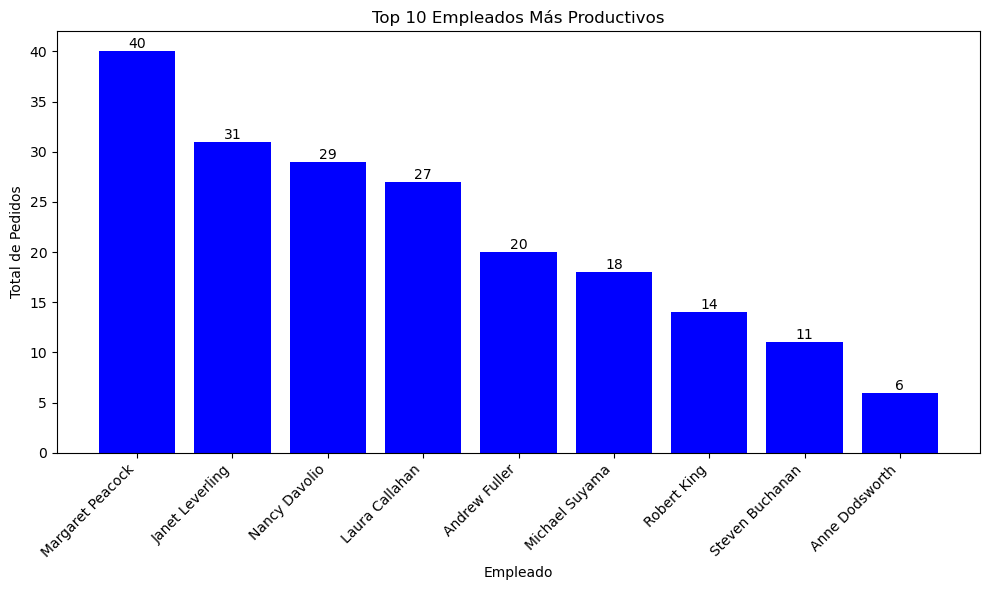

In [23]:
import matplotlib.pyplot as plt

# Obtener datos de la consulta
empleados = df_consulta_empleado_mas_productivo2['NombreDeEmpleados']
total_pedidos = df_consulta_empleado_mas_productivo2['TotalPedidos']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(empleados, total_pedidos, color='blue')
plt.title('Top 10 Empleados Más Productivos')
plt.xlabel('Empleado')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de datos encima de las barras
for i, value in enumerate(total_pedidos):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


¿Cuál es el empleado con el mayor valor de ventas?

In [24]:
empleado_mayor_ventas = "SELECT EmployeeID,(SELECT FirstName || ' ' || LastName FROM Employees WHERE EmployeeID = o.EmployeeID) AS NombreEmpleado,SUM(od.Quantity * p.Price) AS TotalVentas FROM Orders o JOIN OrderDetails od ON o.OrderID = od.OrderID JOIN Products p ON od.ProductID = p.ProductID GROUP BY EmployeeID ORDER BY TotalVentas DESC LIMIT 1"
df_empleado_mayor_ventas = ejecutar_consulta_sql(empleado_mayor_ventas)
df_empleado_mayor_ventas

,EmployeeID,NombreEmpleado,TotalVentas
0,4,Margaret Peacock,105696.5


In [25]:
#Los 10 empleados con mayor ventas
empleado_mayor_ventas2 = "SELECT EmployeeID,(SELECT FirstName || ' ' || LastName FROM Employees WHERE EmployeeID = o.EmployeeID) AS NombreEmpleado,SUM(od.Quantity * p.Price) AS TotalVentas FROM Orders o JOIN OrderDetails od ON o.OrderID = od.OrderID JOIN Products p ON od.ProductID = p.ProductID GROUP BY EmployeeID ORDER BY TotalVentas DESC LIMIT 10;"
df_empleado_mayor_ventas2 = ejecutar_consulta_sql(empleado_mayor_ventas2)
df_empleado_mayor_ventas2

,EmployeeID,NombreEmpleado,TotalVentas
0,4,Margaret Peacock,105696.50
1,1,Nancy Davolio,57690.39
2,3,Janet Leverling,42838.35
3,7,Robert King,39772.30
4,8,Laura Callahan,39309.38
5,2,Andrew Fuller,32503.16
6,5,Steven Buchanan,27480.80
7,6,Michael Suyama,25399.25
8,9,Anne Dodsworth,15734.10


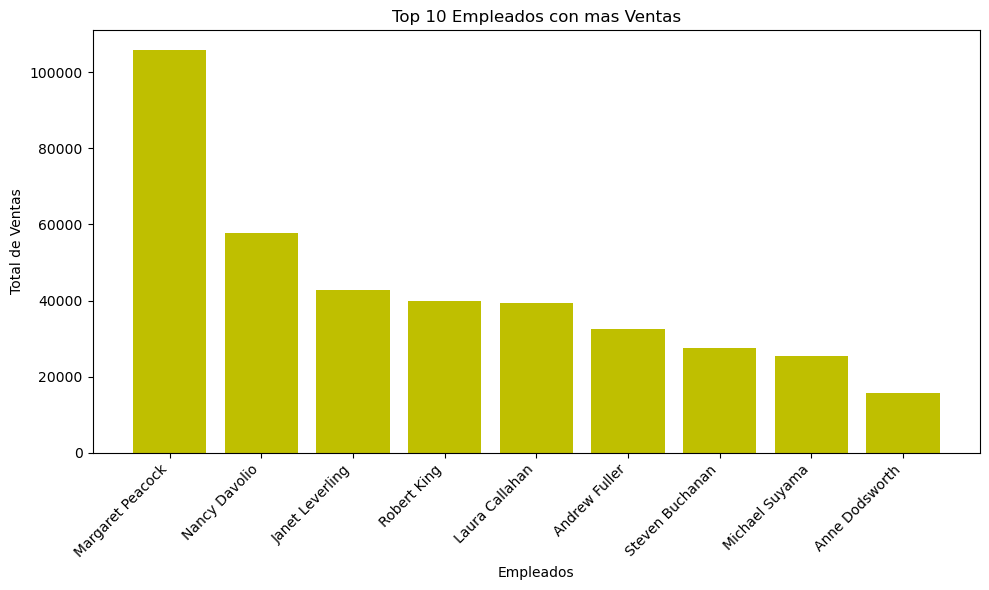

In [26]:
import matplotlib.pyplot as plt

# Obtener datos de la consulta
empleados = df_empleado_mayor_ventas2['NombreEmpleado']
total_ventas = df_empleado_mayor_ventas2['TotalVentas']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(empleados, total_ventas, color='y')
plt.title('Top 10 Empleados con mas Ventas')
plt.xlabel('Empleados')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Análisis de pedidos

¿Cuál es la fecha con más pedidos?

In [27]:
fecha_mas_pedidos = "SELECT OrderDate,COUNT(OrderID) AS TotalPedidos From Orders Group By OrderDate Order By TotalPedidos DESC LIMIT 1"
df_fecha_mas_pedidos = ejecutar_consulta_sql(fecha_mas_pedidos)
df_fecha_mas_pedidos

,OrderDate,TotalPedidos
0,1997-02-10,2


# Análisis de proveedores y envíos

¿Cuántos proveedores hay en cada país?

In [30]:
consulta_proveedores_pais = "SELECT Country,COUNT(*) AS TotalProveedores FROM Suppliers GROUP BY Country ORDER BY TotalProveedores DESC"
df_consulta_provedores = ejecutar_consulta_sql(consulta_proveedores_pais)
df_consulta_provedores

,Country,TotalProveedores
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


¿Cuál es el proveedor que más productos suministra?

In [36]:
provedor_producto = "SELECT s.SupplierID,s.SupplierName,COUNT(p.ProductID) AS TotalProductoSuministrados FROM Suppliers s JOIN Products p ON p.SupplierID = s.SupplierID GROUP BY s.SupplierID,s.SupplierName ORDER BY TotalProductoSuministrados DESC LIMIT 1"
df_provedor_producto = ejecutar_consulta_sql(provedor_producto)
df_provedor_producto

,SupplierID,SupplierName,TotalProductoSuministrados
0,7,"Pavlova, Ltd.",5


¿Cuál es el método de envío más utilizado?

In [37]:
metodo_envio = "SELECT ShipperID, COUNT(*) AS TotalPedidos FROM Orders GROUP BY ShipperID ORDER BY TotalPedidos DESC LIMIT 1"
df_metodo_envio = ejecutar_consulta_sql(metodo_envio)
df_metodo_envio

,ShipperID,TotalPedidos
0,2,74
